# Kuramoto demo

In [1]:
%matplotlib inline
import torch
from ode import Kuramoto

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
method = 'dopri5'
adjoint = False
default_type = torch.float64
torch.set_default_dtype(default_type)

In [3]:
args = {'N': 100,
        'v': 0.5,
        'K': 0.2
       }
M = 5

kuramoto = Kuramoto(args, method, adjoint)
kuramoto.init_state(M)
kuramoto.to(device)

T = 151
t = torch.linspace(0, T//2, T)
t0 = 50
T -= t0

kuramoto.eval()
kuramoto.solve(t)
kuramoto.trim(t0)

Elapsed time: 3.49 s


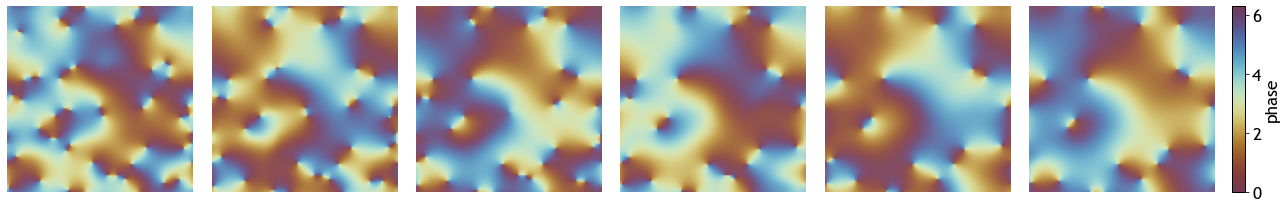

In [4]:
fig = kuramoto.plot_series(kuramoto.y[:,0].cpu().numpy().reshape(-1,kuramoto.N,kuramoto.N),
                           ntype='mod', clabel='phase')